In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
# we are defining the name of the columns.
#Its important to make sure that the csv file and ipynb notebook are in the same folder. If they are in different folder then we have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1. Lets analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

#### Number of points

In [3]:
print('The shape of the data set is: ',df.shape)

The shape of the data set is:  (306, 4)


#### Number of features

In [4]:
print('The number of features in the data set is: ',len(df.columns[0:3]))

The number of features in the data set is:  3


#### Number of classes and data points per class

In [5]:
print('Total number of classes present: ',len(pd.unique(df["survival_status"])))
#using sets
print(len(set(df["survival_status"])))
print("="*20)
#data points per class
print('These are the data points per class: ')
print(df["survival_status"].value_counts())    # imbalanced data set

Total number of classes present:  2
2
These are the data points per class: 
1    225
2     81
Name: survival_status, dtype: int64


### 2. State the objective of the problem.
Predict the survival status given 3 features namely "age", "operation_Year", and "axil_nodes".

### 3. Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

In [6]:
df_longer = df.loc[df["survival_status"] == 1];
df_short = df.loc[df["survival_status"] == 2];

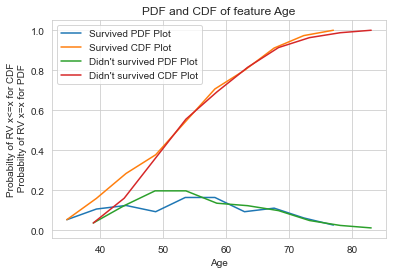

In [7]:
sns.set_style("whitegrid");
# more than five years
counts, bin_edges = np.histogram(df_longer['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Survived PDF Plot")
plt.plot(bin_edges[1:], cdf,label="Survived CDF Plot")


# less than five years
counts, bin_edges = np.histogram(df_short['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Didn't survived PDF Plot")
plt.plot(bin_edges[1:], cdf,label="Didn't survived CDF Plot")
plt.xlabel('Age')
plt.ylabel('Probabilty of RV x<=x for CDF\n Probabilty of RV x=x for PDF')
plt.title("PDF and CDF of feature Age")
plt.legend()
plt.show();

## Observations:
- Probabilty of all people surviving is large for people with age less than 48 compared to probabilty of people not surviving.

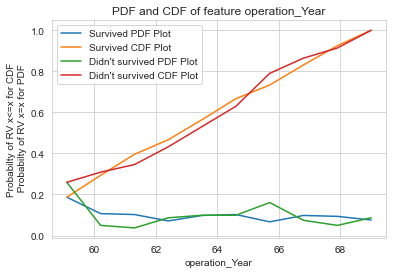

In [8]:
# more than five years
counts, bin_edges = np.histogram(df_longer['operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Survived PDF Plot")
plt.plot(bin_edges[1:], cdf,label="Survived CDF Plot")


# less than five years
counts, bin_edges = np.histogram(df_short['operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Didn't survived PDF Plot")
plt.plot(bin_edges[1:], cdf,label="Didn't survived CDF Plot")
plt.xlabel('operation_Year')
plt.ylabel('Probabilty of RV x<=x for CDF\n Probabilty of RV x=x for PDF')
plt.title("PDF and CDF of feature operation_Year")

plt.legend()
plt.show();

## Observations:
- Doesnt gives much insights.

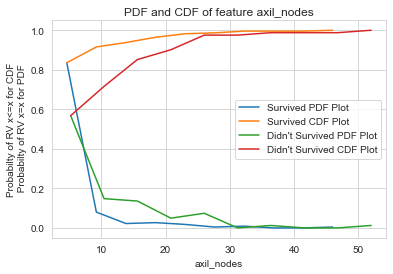

In [9]:

# more than five years
counts, bin_edges = np.histogram(df_longer['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Survived PDF Plot")
plt.plot(bin_edges[1:], cdf,label="Survived CDF Plot")


# less than five years
counts, bin_edges = np.histogram(df_short['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Didn't Survived PDF Plot")
plt.plot(bin_edges[1:], cdf,label="Didn't Survived CDF Plot")
plt.xlabel('axil_nodes')
plt.ylabel('Probabilty of RV x<=x for CDF\n Probabilty of RV x=x for PDF')
plt.title("PDF and CDF of feature axil_nodes")

plt.legend()
plt.show();

## Observations:
- People having Axial nodes greater than 30 seems rare. 
- More than 80% of the people survived have axil_nodes less than 3.
- 90% of the people survived have axil_nodes less than 10.

### Box plots

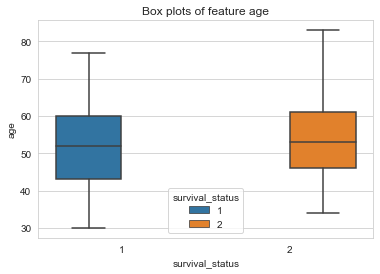

In [10]:
sns.boxplot(x='survival_status', y='age', hue='survival_status', data=df)
plt.title("Box plots of feature age")
plt.show()

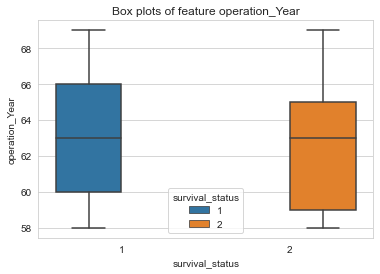

In [11]:
sns.boxplot(x='survival_status',y='operation_Year',hue='survival_status', data=df)
plt.title("Box plots of feature operation_Year")
plt.show()

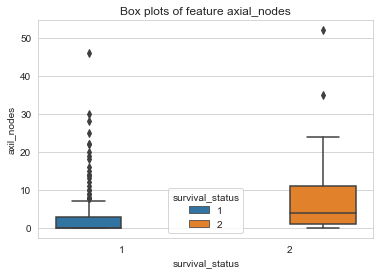

In [12]:
sns.boxplot(x='survival_status',y='axil_nodes',hue='survival_status', data=df)
plt.title("Box plots of feature axial_nodes")
plt.show()

## Observations:
- Axil_nodes data for survived people is skewwed at lower side.
- There are many outliers in case of survived people indicating significant people survived even with many axil_nodes.

### Voilon plots

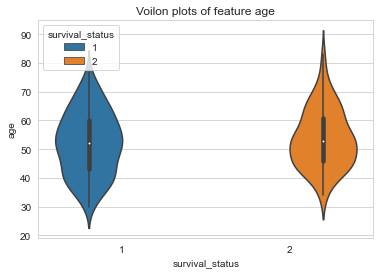

In [13]:
sns.violinplot(x="survival_status", y="age", hue='survival_status', data=df, size=8)
plt.title("Voilon plots of feature age")
plt.show()

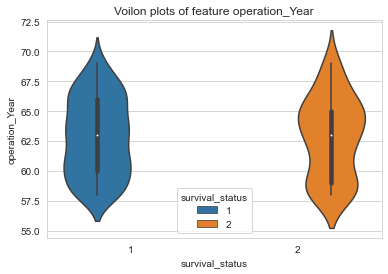

In [14]:
sns.violinplot(x="survival_status", y="operation_Year",hue='survival_status',data=df, size=8)
plt.title("Voilon plots of feature operation_Year")
plt.show()

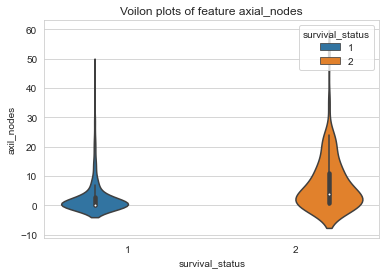

In [15]:
sns.violinplot(x="survival_status", y="axil_nodes",hue='survival_status', data=df, size=8)
plt.title("Voilon plots of feature axial_nodes")
plt.show()

### 4. Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots

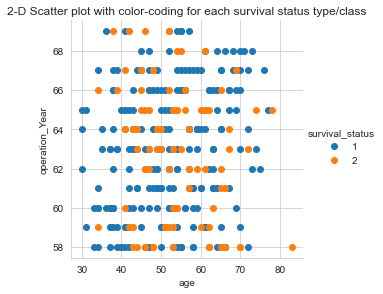

In [16]:
# 2-D Scatter plot with color-coding for each status type/class.
# Here 'sns' corresponds to seaborn. 
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_Year") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each survival status type/class')
plt.show();

# How many cobinations exist? 3C2 = 3.

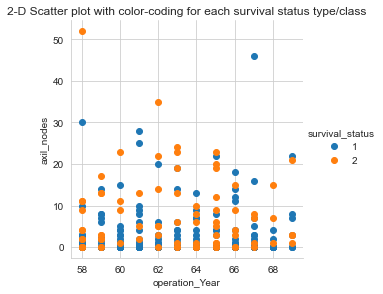

In [17]:
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "operation_Year", "axil_nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each survival status type/class')
plt.show();


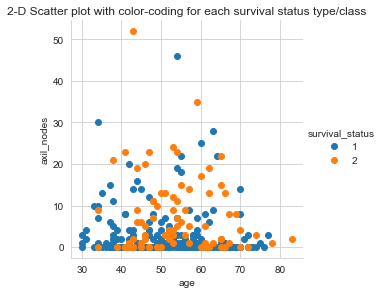

In [18]:
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each survival status type/class')
plt.show();


## Observations on above 2-D axial_node vs age scatter plot:
- Almost everyone survived aged less than 39 irrespective of number of axial nodes except 2.


### Pair-plot

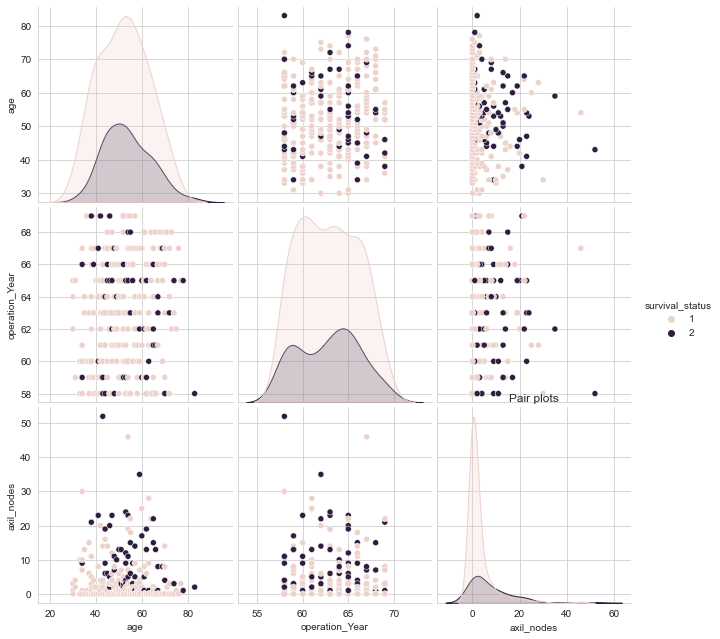

In [19]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.pairplot(df, hue="survival_status", size=3);
plt.title('Pair plots')
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

## Observations:
- Pair-plot of age and axil_nodes show large number of patients have <10 axil_nodes irrespective of age.

### 5. Summarize your final conclusions of the Exploration


### From pair-plots and scatter plots:
- Almost everyone survived aged less than 39 irrespective of number of axial nodes except 2.
- Pair-plot of age and axil_nodes show large number of patients have <10 axil_nodes irrespective of age.

### From CDF and PDF:
- PDF and CDF of axil_nodes gave significant insights into the data.
- People having Axial nodes greater than 30 seems rare. 
- More than 80% of the people survived have axil_nodes less than 3.
- 90% of the people survived have axil_nodes less than 10.
- Probabilty of all people surviving is large for people with age less than 48 compared to probabilty of people not surviving.

### From box-plots
- Axil_nodes data for survived people is skewwed at lower side.
- There are many outliers in case of survived people indicating significant people survived even with many axil_nodes.